## Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set(style="darkgrid")

In [2]:
### We performed data manipulation in Excel in advance. 

### We read the output data and performed data visulization here in python.

### read the result of professors who have classes before 10am or after 6pm.
df = pd.read_excel('Stats and Utilization calculations.xlsx',sheet_name='Ans Before 6 and after 10 Prof')
df.head()

,Term,Prof_Before10AM,Prof_After6PM,Prof_Overall,% Prof Before 10,% Prof After 6
0,2015_3,70,84,190,36.842105,44.210526
1,2016_1,75,99,236,31.779661,41.949153
2,2016_2,9,18,25,36.000000,72.000000
3,2016_3,76,80,211,36.018957,37.914692
4,2017_1,70,85,221,31.674208,38.461538


In [3]:
### replace 2019_1 with sample input data

df_copy = df.copy()
df_copy.iloc[10] = df_copy.iloc[12] 
df_copy.iloc[10,0] = '2019_1'

In [4]:
### read the result of Avg Utilization for each term.

df5 = pd.read_excel('Stats and Utilization calculations.xlsx',sheet_name='Ans weighted average')

In [5]:
### replace 2019_1 with sample input data

df5_copy = df5.copy()
df5_copy.iloc[10] = df5_copy.iloc[12] 
df5_copy.iloc[10,0] = '2019_1'

In [6]:
### read historical schedule
df = pd.read_csv('schedule_2015_to_2019.csv')
### create a mapping, which translate Character into Day.
mapping = {}
mapping['M'] = 1
mapping['T'] = 2
mapping['W'] = 3
mapping['H'] = 4
mapping['F'] = 5
### set a threshold, if the interval of two classes is under the threshold, then we consider it as back to back.
### here we set it to 30 mins
thres = datetime.strptime('00:30:00','%H:%M:%S') - datetime.strptime('00:00:00','%H:%M:%S')
keys = mapping.keys()
thres_day = datetime.strptime('2019-03-04', '%Y-%m-%d') - datetime.strptime('2019-03-04', '%Y-%m-%d')
### Only keep the courses that haven't been cancelled.
df1 = df[df.cancelled==0]

## Table 2.1 Class with minimum utilization rate in each term

In [7]:
### We calculated the lowest utilization rate in each term and made a table in Excel.

## Figure 2.1 Plotting the Overall Avg Utilization Rate

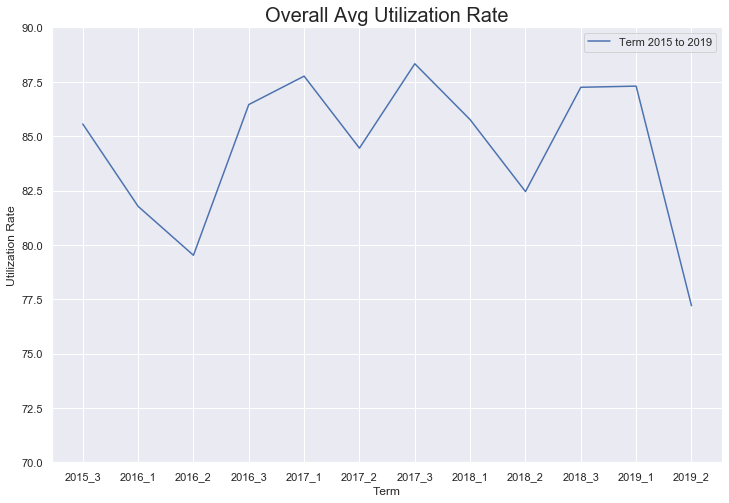

In [8]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Term',y='Weighted Avg Utilization Rate',data=df5_copy.head(12),label='Term 2015 to 2019')
plt.ylabel('Utilization Rate')
plt.title('Overall Avg Utilization Rate',fontsize=20)
plt.ylim((70,90))
plt.legend()
plt.show()

## Table 2.2 : Number of classes with utilization rate < 75% in each term

In [9]:
### Similar to Table 2.1, we calculated the percentage of sessions which have a utilization rate < 75%.
### We also calculated this metrics in Excel.

## Table 2.3 : Faculty Survey Results

In [10]:
### We extracted the result for the faculty survey report.

## Table 2.4 Number of professor who have to work more than two days a week

In [11]:
### We calculated the metric here in Python and refined the table to make it look better in Excel.

In [12]:
### create a list to carry the result of each term from 2015 to 2019

each_term = []
for term in df1.term.unique():
    df_xx = df1[df1.term == term]
    df_xx.classes_begin = df_xx['classes_begin'].fillna('2019-01-07')
    df_xx.classes_end = df_xx['classes_end'].fillna('2019-04-26')
    test_b = (df_xx[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','second_instructor']])
    test_a = (df_xx[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','first_instructor']])

    test_b.columns = ['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','first_instructor']
    test_b = test_b[~test_b.isnull().first_instructor]
    result = pd.concat([test_a,test_b])
    
    
    day_tmp = pd.Series(0,index = result.first_instructor.unique())
    for prof in result.first_instructor.unique():
        tmp = result[result.first_instructor==prof]
        df_tmp = tmp[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room']]
        leng = len(df_tmp)
        df_tmp['M'] = np.zeros(leng)
        df_tmp['T'] = np.zeros(leng)
        df_tmp['W'] = np.zeros(leng)
        df_tmp['H'] = np.zeros(leng)
        df_tmp['F'] = np.zeros(leng)
        for idx in df_tmp.index:
            for m in df_tmp.loc[idx,'first_days']:
                if len(keys - m) < 5:
                    df_tmp.loc[idx,m] = mapping[m]

        tmp1 = df_tmp[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','M']]
        tmp2 = df_tmp[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','T']]
        tmp3 = df_tmp[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','W']]
        tmp4 = df_tmp[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','H']]
        tmp5 = df_tmp[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','F']]

        tmp1.columns = ['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','Day']
        tmp2.columns = ['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','Day']
        tmp3.columns = ['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','Day']
        tmp4.columns = ['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','Day']
        tmp5.columns = ['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','Day']

        final_tmp = pd.DataFrame(columns = ['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','Day'])

        for idx in tmp1.index:
            if tmp1.loc[idx,'Day'] > 0:
                final_tmp.loc[idx] = tmp1.loc[idx]
        final_tmp = final_tmp.reset_index().drop('index',axis=1)



        for idx in tmp2.index:
            if tmp2.loc[idx,'Day'] > 0:
                final_tmp.loc[idx] = tmp2.loc[idx]
        final_tmp = final_tmp.reset_index().drop('index',axis=1)

        for idx in tmp3.index:
            if tmp3.loc[idx,'Day'] > 0:
                final_tmp.loc[idx] = tmp3.loc[idx]
        final_tmp = final_tmp.reset_index().drop('index',axis=1)



        for idx in tmp4.index:
            if tmp4.loc[idx,'Day'] > 0:
                final_tmp.loc[idx] = tmp4.loc[idx]
        final_tmp = final_tmp.reset_index().drop('index',axis=1)


        for idx in tmp5.index:
            if tmp5.loc[idx,'Day'] > 0:
                final_tmp.loc[idx] = tmp5.loc[idx]
        final_tmp = final_tmp.reset_index().drop('index',axis=1)

        final_tmp = final_tmp.sort_values(['Day','first_begin_time'],ascending = [1,1]).reset_index().drop('index',axis=1)
        final_tmp = final_tmp.dropna()
        day_tmp.loc[prof] = len(final_tmp.Day.unique())
    each_term.append([sum(day_tmp>2),len(day_tmp)])



/Users/j/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [13]:
idx = pd.read_excel('final_class_sample_input.xlsx')['section']
df2 = df1[df1.term == 20191]


df_xx = df2[df2.section.isin(idx)]
df_xx.classes_begin = df_xx['classes_begin'].fillna('2019-01-07')
df_xx.classes_end = df_xx['classes_end'].fillna('2019-04-26')
test_b = (df_xx[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','second_instructor']])
test_a = (df_xx[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','first_instructor']])

test_b.columns = ['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','first_instructor']
test_b = test_b[~test_b.isnull().first_instructor]
result = pd.concat([test_a,test_b])


day_tmp = pd.Series(0,index = result.first_instructor.unique())
for prof in result.first_instructor.unique():
    tmp = result[result.first_instructor==prof]
    df_tmp = tmp[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room']]
    leng = len(df_tmp)
    df_tmp['M'] = np.zeros(leng)
    df_tmp['T'] = np.zeros(leng)
    df_tmp['W'] = np.zeros(leng)
    df_tmp['H'] = np.zeros(leng)
    df_tmp['F'] = np.zeros(leng)
    for idx in df_tmp.index:
        for m in df_tmp.loc[idx,'first_days']:
            if len(keys - m) < 5:
                df_tmp.loc[idx,m] = mapping[m]

    tmp1 = df_tmp[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','M']]
    tmp2 = df_tmp[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','T']]
    tmp3 = df_tmp[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','W']]
    tmp4 = df_tmp[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','H']]
    tmp5 = df_tmp[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','F']]

    tmp1.columns = ['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','Day']
    tmp2.columns = ['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','Day']
    tmp3.columns = ['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','Day']
    tmp4.columns = ['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','Day']
    tmp5.columns = ['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','Day']

    final_tmp = pd.DataFrame(columns = ['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','Day'])

    for idx in tmp1.index:
        if tmp1.loc[idx,'Day'] > 0:
            final_tmp.loc[idx] = tmp1.loc[idx]
    final_tmp = final_tmp.reset_index().drop('index',axis=1)



    for idx in tmp2.index:
        if tmp2.loc[idx,'Day'] > 0:
            final_tmp.loc[idx] = tmp2.loc[idx]
    final_tmp = final_tmp.reset_index().drop('index',axis=1)

    for idx in tmp3.index:
        if tmp3.loc[idx,'Day'] > 0:
            final_tmp.loc[idx] = tmp3.loc[idx]
    final_tmp = final_tmp.reset_index().drop('index',axis=1)



    for idx in tmp4.index:
        if tmp4.loc[idx,'Day'] > 0:
            final_tmp.loc[idx] = tmp4.loc[idx]
    final_tmp = final_tmp.reset_index().drop('index',axis=1)


    for idx in tmp5.index:
        if tmp5.loc[idx,'Day'] > 0:
            final_tmp.loc[idx] = tmp5.loc[idx]
    final_tmp = final_tmp.reset_index().drop('index',axis=1)

    final_tmp = final_tmp.sort_values(['Day','first_begin_time'],ascending = [1,1]).reset_index().drop('index',axis=1)
    final_tmp = final_tmp.dropna()
    day_tmp.loc[prof] = len(final_tmp.Day.unique())
each_term.append([sum(day_tmp>2),len(day_tmp)])

In [14]:
day_morethan_2 = pd.DataFrame(each_term,index=list(df1.term.unique()).append('sample'),columns=['More than 2 days', 'professor'])
df = pd.read_excel('Stats and Utilization calculations.xlsx',sheet_name='Ans Before 6 and after 10 Prof')
df_t = pd.read_excel('Stats and Utilization calculations.xlsx',sheet_name='Ans Before 6 and after 10 Prof')
day_morethan_2['Term'] =df_t.Term


In [15]:
day_morethan_2

,More than 2 days,professor,Term
0,58,199,2015_3
1,66,246,2016_1
2,5,29,2016_2
3,52,219,2016_3
4,54,232,2017_1
5,6,28,2017_2
6,60,221,2017_3
7,57,243,2018_1
8,7,28,2018_2
9,48,225,2018_3


## Table 2.5 Faculty Survey Results

In [16]:
### We extracted the result for the faculty survey report.

## Figure 2.2 Plotting the % of professor who has back to back sessions

In [17]:
### create a list to carry the result of each term from 2015 to 2019

each_term = []
for term in df1.term.unique():
    df_xx = df1[df1.term == term]
    df_xx.classes_begin = df_xx['classes_begin'].fillna('2019-01-07')
    df_xx.classes_end = df_xx['classes_end'].fillna('2019-04-26')
    test_b = (df_xx[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','second_instructor']])
    test_a = (df_xx[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','first_instructor']])

    test_b.columns = ['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','first_instructor']
    test_b = test_b[~test_b.isnull().first_instructor]
    result = pd.concat([test_a,test_b])
    
    
    count_tmp = pd.Series(0,index = result.first_instructor.unique())
    for prof in result.first_instructor.unique():
        tmp = result[result.first_instructor==prof]
        df_tmp = tmp[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room']]
        leng = len(df_tmp)
        df_tmp['M'] = np.zeros(leng)
        df_tmp['T'] = np.zeros(leng)
        df_tmp['W'] = np.zeros(leng)
        df_tmp['H'] = np.zeros(leng)
        df_tmp['F'] = np.zeros(leng)
        for idx in df_tmp.index:
            for m in df_tmp.loc[idx,'first_days']:
                if len(keys - m) < 5:
                    df_tmp.loc[idx,m] = mapping[m]

        tmp1 = df_tmp[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','M']]
        tmp2 = df_tmp[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','T']]
        tmp3 = df_tmp[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','W']]
        tmp4 = df_tmp[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','H']]
        tmp5 = df_tmp[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','F']]

        tmp1.columns = ['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','Day']
        tmp2.columns = ['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','Day']
        tmp3.columns = ['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','Day']
        tmp4.columns = ['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','Day']
        tmp5.columns = ['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','Day']

        final_tmp = pd.DataFrame(columns = ['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','Day'])

        for idx in tmp1.index:
            if tmp1.loc[idx,'Day'] > 0:
                final_tmp.loc[idx] = tmp1.loc[idx]
        final_tmp = final_tmp.reset_index().drop('index',axis=1)



        for idx in tmp2.index:
            if tmp2.loc[idx,'Day'] > 0:
                final_tmp.loc[idx] = tmp2.loc[idx]
        final_tmp = final_tmp.reset_index().drop('index',axis=1)

        for idx in tmp3.index:
            if tmp3.loc[idx,'Day'] > 0:
                final_tmp.loc[idx] = tmp3.loc[idx]
        final_tmp = final_tmp.reset_index().drop('index',axis=1)



        for idx in tmp4.index:
            if tmp4.loc[idx,'Day'] > 0:
                final_tmp.loc[idx] = tmp4.loc[idx]
        final_tmp = final_tmp.reset_index().drop('index',axis=1)


        for idx in tmp5.index:
            if tmp5.loc[idx,'Day'] > 0:
                final_tmp.loc[idx] = tmp5.loc[idx]
        final_tmp = final_tmp.reset_index().drop('index',axis=1)

        final_tmp = final_tmp.sort_values(['Day','first_begin_time'],ascending = [1,1]).reset_index().drop('index',axis=1)
        final_tmp = final_tmp.dropna()
        for i in range(1,len(final_tmp)):
            if final_tmp.iloc[i,7] == final_tmp.iloc[i-1,7]:
                if (final_tmp.iloc[i,4] != 'TBA') & (final_tmp.iloc[i-1,5] != 'TBA'):
                    lag = datetime.strptime(final_tmp.iloc[i,4],'%H:%M:%S')-datetime.strptime(final_tmp.iloc[i-1,5],'%H:%M:%S')
                    if lag < thres:
                        if ((datetime.strptime(final_tmp.iloc[i,2], '%Y-%m-%d') - datetime.strptime(final_tmp.iloc[i-1,1], '%Y-%m-%d') >= thres_day)\
                        and (datetime.strptime(final_tmp.iloc[i,1], '%Y-%m-%d') - datetime.strptime(final_tmp.iloc[i-1,1], '%Y-%m-%d') <= thres_day)) or \
                        ((datetime.strptime(final_tmp.iloc[i-1,2], '%Y-%m-%d') - datetime.strptime(final_tmp.iloc[i,1], '%Y-%m-%d') >= thres_day)\
                        and (datetime.strptime(final_tmp.iloc[i-1,1], '%Y-%m-%d') - datetime.strptime(final_tmp.iloc[i,1], '%Y-%m-%d') <= thres_day)):
                            count_tmp.loc[prof] = 1
    each_term.append([count_tmp.sum(),len(count_tmp)])


In [18]:
idx = pd.read_excel('final_class_sample_input.xlsx')['section']
df2 = df1[df1.term == 20191]
### Calculate the sample input data result

df_xx = df2[df2.section.isin(idx)]
df_xx.classes_begin = df_xx['classes_begin'].fillna('2019-01-07')
df_xx.classes_end = df_xx['classes_end'].fillna('2019-04-26')
test_b = (df_xx[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','second_instructor']])
test_a = (df_xx[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','first_instructor']])

test_b.columns = ['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','first_instructor']
test_b = test_b[~test_b.isnull().first_instructor]
result = pd.concat([test_a,test_b])


count_tmp = pd.Series(0,index = result.first_instructor.unique())
for prof in result.first_instructor.unique():
    tmp = result[result.first_instructor==prof]
    df_tmp = tmp[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room']]
    leng = len(df_tmp)
    df_tmp['M'] = np.zeros(leng)
    df_tmp['T'] = np.zeros(leng)
    df_tmp['W'] = np.zeros(leng)
    df_tmp['H'] = np.zeros(leng)
    df_tmp['F'] = np.zeros(leng)
    for idx in df_tmp.index:
        for m in df_tmp.loc[idx,'first_days']:
            if len(keys - m) < 5:
                df_tmp.loc[idx,m] = mapping[m]

    tmp1 = df_tmp[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','M']]
    tmp2 = df_tmp[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','T']]
    tmp3 = df_tmp[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','W']]
    tmp4 = df_tmp[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','H']]
    tmp5 = df_tmp[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','F']]

    tmp1.columns = ['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','Day']
    tmp2.columns = ['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','Day']
    tmp3.columns = ['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','Day']
    tmp4.columns = ['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','Day']
    tmp5.columns = ['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','Day']

    final_tmp = pd.DataFrame(columns = ['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','Day'])

    for idx in tmp1.index:
        if tmp1.loc[idx,'Day'] > 0:
            final_tmp.loc[idx] = tmp1.loc[idx]
    final_tmp = final_tmp.reset_index().drop('index',axis=1)



    for idx in tmp2.index:
        if tmp2.loc[idx,'Day'] > 0:
            final_tmp.loc[idx] = tmp2.loc[idx]
    final_tmp = final_tmp.reset_index().drop('index',axis=1)

    for idx in tmp3.index:
        if tmp3.loc[idx,'Day'] > 0:
            final_tmp.loc[idx] = tmp3.loc[idx]
    final_tmp = final_tmp.reset_index().drop('index',axis=1)



    for idx in tmp4.index:
        if tmp4.loc[idx,'Day'] > 0:
            final_tmp.loc[idx] = tmp4.loc[idx]
    final_tmp = final_tmp.reset_index().drop('index',axis=1)


    for idx in tmp5.index:
        if tmp5.loc[idx,'Day'] > 0:
            final_tmp.loc[idx] = tmp5.loc[idx]
    final_tmp = final_tmp.reset_index().drop('index',axis=1)

    final_tmp = final_tmp.sort_values(['Day','first_begin_time'],ascending = [1,1]).reset_index().drop('index',axis=1)
    final_tmp = final_tmp.dropna()
    for i in range(1,len(final_tmp)):
        if final_tmp.iloc[i,7] == final_tmp.iloc[i-1,7]:
            if (final_tmp.iloc[i,4] != 'TBA') & (final_tmp.iloc[i-1,5] != 'TBA'):
                lag = datetime.strptime(final_tmp.iloc[i,4],'%H:%M:%S')-datetime.strptime(final_tmp.iloc[i-1,5],'%H:%M:%S')
                if lag < thres:
                    if ((datetime.strptime(final_tmp.iloc[i,2], '%Y-%m-%d') - datetime.strptime(final_tmp.iloc[i-1,1], '%Y-%m-%d') >= thres_day)\
                    and (datetime.strptime(final_tmp.iloc[i,1], '%Y-%m-%d') - datetime.strptime(final_tmp.iloc[i-1,1], '%Y-%m-%d') <= thres_day)) or \
                    ((datetime.strptime(final_tmp.iloc[i-1,2], '%Y-%m-%d') - datetime.strptime(final_tmp.iloc[i,1], '%Y-%m-%d') >= thres_day)\
                    and (datetime.strptime(final_tmp.iloc[i-1,1], '%Y-%m-%d') - datetime.strptime(final_tmp.iloc[i,1], '%Y-%m-%d') <= thres_day)):
                        count_tmp.loc[prof] = 1
each_term.append([count_tmp.sum(),len(count_tmp)])


In [19]:
### create a dataframe to carry the result
list(df1.term.unique()).append('sample')
carry = pd.DataFrame(each_term,index=list(df1.term.unique()).append('sample'),columns=['Back to Back with different classrooms', 'professor'])
carry['percentage'] = carry['Back to Back with different classrooms']/carry['professor']
df_t = pd.read_excel('Stats and Utilization calculations.xlsx',sheet_name='Ans Before 6 and after 10 Prof')
carry['Term'] = df_t.Term
### replace 2019_1 term with sample data input
carry_copy = carry.copy()
carry_copy.iloc[10] = carry_copy.iloc[12] 
carry_copy.iloc[10,3] = '2019_1'
carry_copy.percentage = carry_copy.percentage*100

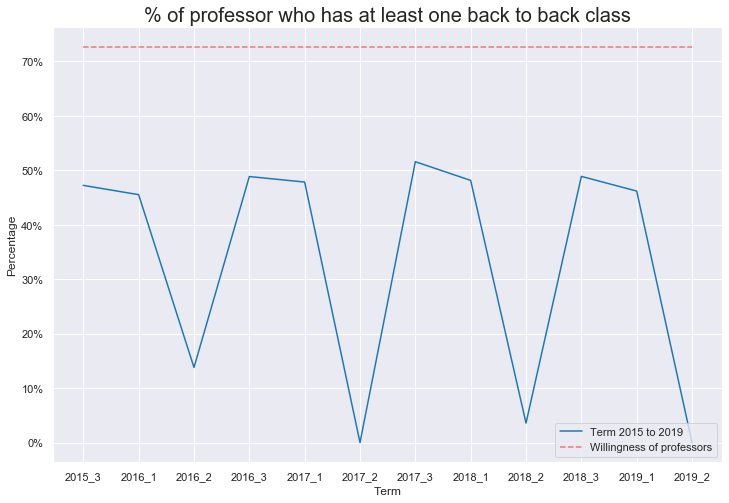

In [20]:
plt.figure(figsize=(12,8))
sns.lineplot(x="Term", y="percentage",color='tab:blue',
             data=carry_copy.head(12),label='Term 2015 to 2019')

plt.ylabel('Percentage')
ax = plt.gca()
ax.set_yticklabels(['x','0%','10%','20%','30%','40%','50%','60%','70%','80%'])

plt.hlines(72.62,xmin='2015_3',xmax='2019_2',color='red',alpha=0.5,linestyles='dashed',label='Willingness of professors')
plt.title('% of professor who has at least one back to back class',fontsize=20)
plt.legend(loc=4)
plt.show()

## Figuer 2.3 Plotting the % of professor who has back to back sessions in different classrooms

In [21]:
### create a list to carry the result of each term from 2015 to 2019

each_term = []
for term in df1.term.unique():
    df_xx = df1[df1.term == term]
    df_xx.classes_begin = df_xx['classes_begin'].fillna('2019-01-07')
    df_xx.classes_end = df_xx['classes_end'].fillna('2019-04-26')
    test_b = (df_xx[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','second_instructor']])
    test_a = (df_xx[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','first_instructor']])

    test_b.columns = ['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','first_instructor']
    test_b = test_b[~test_b.isnull().first_instructor]
    result = pd.concat([test_a,test_b])
    
    
    count_tmp = pd.Series(0,index = result.first_instructor.unique())
    for prof in result.first_instructor.unique():
        tmp = result[result.first_instructor==prof]
        df_tmp = tmp[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room']]
        leng = len(df_tmp)
        df_tmp['M'] = np.zeros(leng)
        df_tmp['T'] = np.zeros(leng)
        df_tmp['W'] = np.zeros(leng)
        df_tmp['H'] = np.zeros(leng)
        df_tmp['F'] = np.zeros(leng)
        for idx in df_tmp.index:
            for m in df_tmp.loc[idx,'first_days']:
                if len(keys - m) < 5:
                    df_tmp.loc[idx,m] = mapping[m]

        tmp1 = df_tmp[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','M']]
        tmp2 = df_tmp[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','T']]
        tmp3 = df_tmp[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','W']]
        tmp4 = df_tmp[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','H']]
        tmp5 = df_tmp[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','F']]

        tmp1.columns = ['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','Day']
        tmp2.columns = ['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','Day']
        tmp3.columns = ['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','Day']
        tmp4.columns = ['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','Day']
        tmp5.columns = ['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','Day']

        final_tmp = pd.DataFrame(columns = ['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','Day'])

        for idx in tmp1.index:
            if tmp1.loc[idx,'Day'] > 0:
                final_tmp.loc[idx] = tmp1.loc[idx]
        final_tmp = final_tmp.reset_index().drop('index',axis=1)



        for idx in tmp2.index:
            if tmp2.loc[idx,'Day'] > 0:
                final_tmp.loc[idx] = tmp2.loc[idx]
        final_tmp = final_tmp.reset_index().drop('index',axis=1)

        for idx in tmp3.index:
            if tmp3.loc[idx,'Day'] > 0:
                final_tmp.loc[idx] = tmp3.loc[idx]
        final_tmp = final_tmp.reset_index().drop('index',axis=1)



        for idx in tmp4.index:
            if tmp4.loc[idx,'Day'] > 0:
                final_tmp.loc[idx] = tmp4.loc[idx]
        final_tmp = final_tmp.reset_index().drop('index',axis=1)


        for idx in tmp5.index:
            if tmp5.loc[idx,'Day'] > 0:
                final_tmp.loc[idx] = tmp5.loc[idx]
        final_tmp = final_tmp.reset_index().drop('index',axis=1)

        final_tmp = final_tmp.sort_values(['Day','first_begin_time'],ascending = [1,1]).reset_index().drop('index',axis=1)
        final_tmp = final_tmp.dropna()
        for i in range(1,len(final_tmp)):
            if final_tmp.iloc[i,7] == final_tmp.iloc[i-1,7]:
                if (final_tmp.iloc[i,4] != 'TBA') & (final_tmp.iloc[i-1,5] != 'TBA'):
                    lag = datetime.strptime(final_tmp.iloc[i,4],'%H:%M:%S')-datetime.strptime(final_tmp.iloc[i-1,5],'%H:%M:%S')
                    if lag < thres:
                        if final_tmp.iloc[i,6] != final_tmp.iloc[i-1,6]:
                            if ((datetime.strptime(final_tmp.iloc[i,2], '%Y-%m-%d') - datetime.strptime(final_tmp.iloc[i-1,1], '%Y-%m-%d') >= thres_day)\
                            and (datetime.strptime(final_tmp.iloc[i,1], '%Y-%m-%d') - datetime.strptime(final_tmp.iloc[i-1,1], '%Y-%m-%d') <= thres_day)) or \
                            ((datetime.strptime(final_tmp.iloc[i-1,2], '%Y-%m-%d') - datetime.strptime(final_tmp.iloc[i,1], '%Y-%m-%d') >= thres_day)\
                            and (datetime.strptime(final_tmp.iloc[i-1,1], '%Y-%m-%d') - datetime.strptime(final_tmp.iloc[i,1], '%Y-%m-%d') <= thres_day)):
                                count_tmp.loc[prof] = 1
    each_term.append([count_tmp.sum(),len(count_tmp)])


In [22]:
idx = pd.read_excel('final_class_sample_input.xlsx')['section']
df2 = df1[df1.term == 20191]
### Calculate the sample input data result

df_xx = df2[df2.section.isin(idx)]
df_xx.classes_begin = df_xx['classes_begin'].fillna('2019-01-07')
df_xx.classes_end = df_xx['classes_end'].fillna('2019-04-26')
test_b = (df_xx[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','second_instructor']])
test_a = (df_xx[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','first_instructor']])

test_b.columns = ['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','first_instructor']
test_b = test_b[~test_b.isnull().first_instructor]
result = pd.concat([test_a,test_b])


count_tmp = pd.Series(0,index = result.first_instructor.unique())
for prof in result.first_instructor.unique():
    tmp = result[result.first_instructor==prof]
    df_tmp = tmp[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room']]
    leng = len(df_tmp)
    df_tmp['M'] = np.zeros(leng)
    df_tmp['T'] = np.zeros(leng)
    df_tmp['W'] = np.zeros(leng)
    df_tmp['H'] = np.zeros(leng)
    df_tmp['F'] = np.zeros(leng)
    for idx in df_tmp.index:
        for m in df_tmp.loc[idx,'first_days']:
            if len(keys - m) < 5:
                df_tmp.loc[idx,m] = mapping[m]

    tmp1 = df_tmp[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','M']]
    tmp2 = df_tmp[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','T']]
    tmp3 = df_tmp[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','W']]
    tmp4 = df_tmp[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','H']]
    tmp5 = df_tmp[['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','F']]

    tmp1.columns = ['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','Day']
    tmp2.columns = ['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','Day']
    tmp3.columns = ['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','Day']
    tmp4.columns = ['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','Day']
    tmp5.columns = ['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','Day']

    final_tmp = pd.DataFrame(columns = ['section','classes_begin','classes_end','first_days','first_begin_time','first_end_time','first_room','Day'])

    for idx in tmp1.index:
        if tmp1.loc[idx,'Day'] > 0:
            final_tmp.loc[idx] = tmp1.loc[idx]
    final_tmp = final_tmp.reset_index().drop('index',axis=1)



    for idx in tmp2.index:
        if tmp2.loc[idx,'Day'] > 0:
            final_tmp.loc[idx] = tmp2.loc[idx]
    final_tmp = final_tmp.reset_index().drop('index',axis=1)

    for idx in tmp3.index:
        if tmp3.loc[idx,'Day'] > 0:
            final_tmp.loc[idx] = tmp3.loc[idx]
    final_tmp = final_tmp.reset_index().drop('index',axis=1)



    for idx in tmp4.index:
        if tmp4.loc[idx,'Day'] > 0:
            final_tmp.loc[idx] = tmp4.loc[idx]
    final_tmp = final_tmp.reset_index().drop('index',axis=1)


    for idx in tmp5.index:
        if tmp5.loc[idx,'Day'] > 0:
            final_tmp.loc[idx] = tmp5.loc[idx]
    final_tmp = final_tmp.reset_index().drop('index',axis=1)

    final_tmp = final_tmp.sort_values(['Day','first_begin_time'],ascending = [1,1]).reset_index().drop('index',axis=1)
    final_tmp = final_tmp.dropna()
    for i in range(1,len(final_tmp)):
        if final_tmp.iloc[i,7] == final_tmp.iloc[i-1,7]:
            if (final_tmp.iloc[i,4] != 'TBA') & (final_tmp.iloc[i-1,5] != 'TBA'):
                lag = datetime.strptime(final_tmp.iloc[i,4],'%H:%M:%S')-datetime.strptime(final_tmp.iloc[i-1,5],'%H:%M:%S')
                if lag < thres:
                    if final_tmp.iloc[i,6] != final_tmp.iloc[i-1,6]:
                        if ((datetime.strptime(final_tmp.iloc[i,2], '%Y-%m-%d') - datetime.strptime(final_tmp.iloc[i-1,1], '%Y-%m-%d') >= thres_day)\
                        and (datetime.strptime(final_tmp.iloc[i,1], '%Y-%m-%d') - datetime.strptime(final_tmp.iloc[i-1,1], '%Y-%m-%d') <= thres_day)) or \
                        ((datetime.strptime(final_tmp.iloc[i-1,2], '%Y-%m-%d') - datetime.strptime(final_tmp.iloc[i,1], '%Y-%m-%d') >= thres_day)\
                        and (datetime.strptime(final_tmp.iloc[i-1,1], '%Y-%m-%d') - datetime.strptime(final_tmp.iloc[i,1], '%Y-%m-%d') <= thres_day)):
                            count_tmp.loc[prof] = 1
each_term.append([count_tmp.sum(),len(count_tmp)])


In [23]:
### create a dataframe to carry the result
list(df1.term.unique()).append('sample')
carry = pd.DataFrame(each_term,index=list(df1.term.unique()).append('sample'),columns=['Back to Back with different classrooms', 'professor'])
carry['percentage'] = carry['Back to Back with different classrooms']/carry['professor']
df_t = pd.read_excel('Stats and Utilization calculations.xlsx',sheet_name='Ans Before 6 and after 10 Prof')
carry['Term'] = df_t.Term
### replace 2019_1 term with sample data input
carry_copy = carry.copy()
carry_copy.iloc[10] = carry_copy.iloc[12] 
carry_copy.iloc[10,3] = '2019_1'
carry_copy.percentage = carry_copy.percentage*100

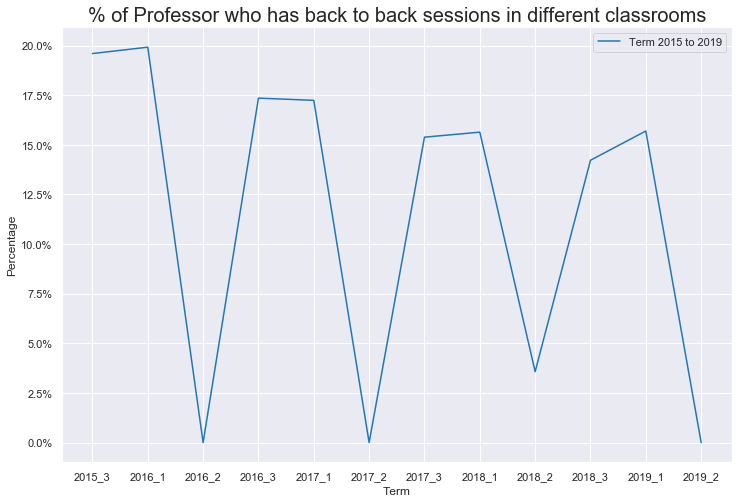

In [24]:
plt.figure(figsize=(12,8))
sns.lineplot(x="Term", y="percentage",color='tab:blue',
             data=carry_copy.head(12),label='Term 2015 to 2019')
ax = plt.gca()
ax.set_yticklabels(['x','0.0%','2.5%','5.0%','7.5%','10.0%','12.5%','15.0%','17.5%','20.0%'])

plt.ylabel('Percentage')
plt.title('% of Professor who has back to back sessions in different classrooms',fontsize=20)
plt.show()

## Figure 4.1 Plotting the Overall Avg Utilization Rate With Sample Output

In [25]:
plot4 = pd.DataFrame({'Term':['2015_3','2016_1','2016_2','2016_3',\
                              '2017_1','2017_2','2017_3','2018_1',\
                             '2018_2','2018_3','2019_1','2019_2'],
                     'avgRate':[85.5,81.8,79.8,86.5,87.9,84.6,88.5,85.8,82.5,87.2,87.3,77.2]})


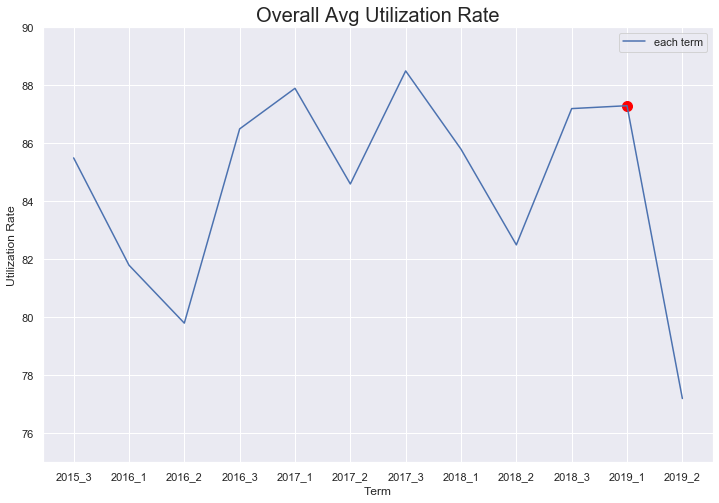

In [26]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Term',y='avgRate',data=plot4,label='each term')
plt.ylabel('Utilization Rate')
plt.title('Overall Avg Utilization Rate',fontsize=20)
plt.scatter(x='2019_1', y=plot4.iloc[10,1], color='red',marker='o',s=100)
plt.ylim((75,90))
plt.legend()
plt.show()

In [27]:
plot4['newavgRate']=[85.5,81.8,79.8,86.5,87.9,84.6,88.5,85.8,82.5,87.2,89.57,77.2]
plot4.head(5)

,Term,avgRate,newavgRate
0,2015_3,85.5,85.5
1,2016_1,81.8,81.8
2,2016_2,79.8,79.8
3,2016_3,86.5,86.5
4,2017_1,87.9,87.9


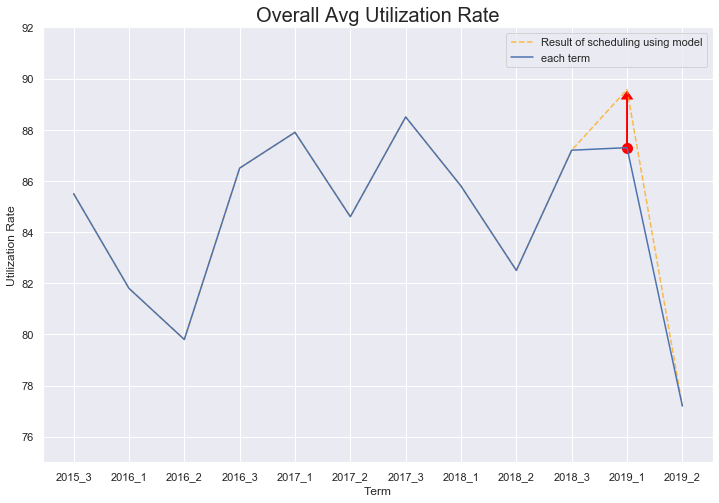

In [28]:
plt.figure(figsize=(12,8))
# Yellow Line
plt.plot(plot4["Term"], plot4["newavgRate"],color='orange',alpha=0.7,linestyle='--',label='Result of scheduling using model')
# Blue Line
sns.lineplot(x='Term',y='avgRate',data=plot4,label='each term')
# Arrow
plt.arrow('2019_1',plot4.iloc[10,1],0,1.9,color='red',head_width=0.2,head_length=0.3,label='Difference')

plt.ylabel('Utilization Rate')
plt.title('Overall Avg Utilization Rate',fontsize=20)
plt.scatter(x='2019_1', y=plot4.iloc[10,1], color='red',marker='o',s=100)
plt.ylim((75,92))
plt.legend()
plt.show()

## Table 4.1 Class with minimum utilization rate

In [29]:
### We calculated the minimun untilization rate in our output, 
### and compared it to the minimun untilization rate of original schedule.

## Table 4.2 Number of classes with utilization rate < 75% in each term

In [30]:
### We calculated the percentage of sessions with utilization rate < 75% in our output, 
### and compared it to that of original schedule.

## Figure 4.2 Plotting the % of professor who has back to back sessions with sample output

In [31]:
# Data Preparation
plot5 = pd.DataFrame({'Term':['2015_3','2016_1','2016_2','2016_3',\
                              '2017_1','2017_2','2017_3','2018_1',\
                             '2018_2','2018_3','2019_1','2019_2'],
                     'Percent':[47.5,45,14,49,48,0.2,51.5,48.5,4,49,46.5,0]})

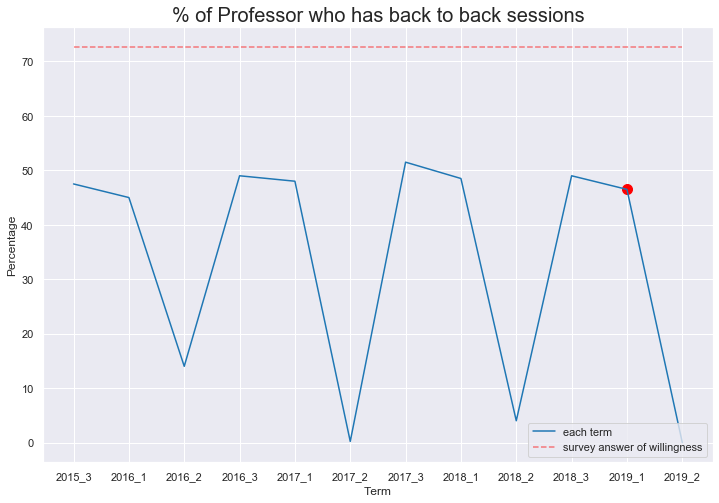

In [32]:
plt.figure(figsize=(12,8))
sns.lineplot(x="Term", y="Percent",color='tab:blue',
             data=plot5,label='each term')

plt.ylabel('Percentage')
plt.scatter(x='2019_1', y=plot5.iloc[10,1], color='red',marker='o',s=100)
plt.hlines(72.62,xmin='2015_3',xmax='2019_2',color='red',alpha=0.5,linestyles='dashed',label='survey answer of willingness')
plt.title('% of Professor who has back to back sessions',fontsize=20)
plt.legend(loc=4)
plt.show()

In [33]:
# Calculate the new % of professor who has back to back sessions
143/223

0.6412556053811659

In [34]:
plot5['newavgRate']=[47.5,45,14,49,48,0.2,51.5,48.5,4,49,64.12,0]
plot5.head(5)

,Term,Percent,newavgRate
0,2015_3,47.5,47.5
1,2016_1,45.0,45.0
2,2016_2,14.0,14.0
3,2016_3,49.0,49.0
4,2017_1,48.0,48.0


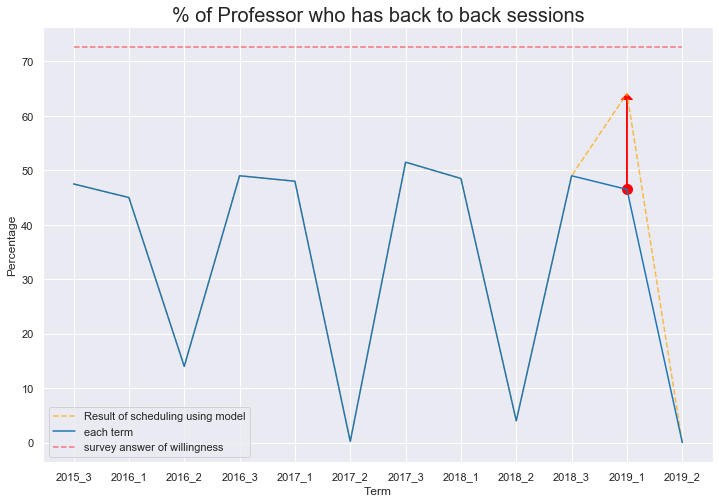

In [35]:
plt.figure(figsize=(12,8))
# Yellow Line
plt.plot(plot5["Term"], plot5["newavgRate"],color='orange',alpha=0.7,linestyle='--',label='Result of scheduling using model')
# Blue Line
sns.lineplot(x="Term", y="Percent",color='tab:blue',
             data=plot5,label='each term')
# Arrow
plt.arrow('2019_1',plot5.iloc[10,1],0,16.5,color='red',head_width=0.2,head_length=1,label='Difference')
plt.ylabel('Percentage')
plt.scatter(x='2019_1', y=plot5.iloc[10,1], color='red',marker='o',s=100)
plt.hlines(72.62,xmin='2015_3',xmax='2019_2',color='red',alpha=0.5,linestyles='dashed',label='survey answer of willingness')
plt.title('% of Professor who has back to back sessions',fontsize=20)
plt.legend(loc=3)
plt.show()

## Table 4.3 % of Professor who has to work more than two days a week

In [36]:
### We calculated how much percentage of professors have to work more than 2 days a week in our sample output.